<h2 align='center'> Time Series with Pandas</h2>

<h3> In this program we will be working on Rolling and Expanding methods</h3>

Rolling mean --> we can divide the data into windows of time and then calculate aggregate function for each window. In this way we achieve a simple moving average.

Expanding --> take everything from the start of the series upto each point in time

In [2]:
# Import libraries
from datetime import datetime
import numpy as np
import pandas as pd

<h3> Read Dataset (Import Dataset)</h3>

In [3]:
#read dataset 'starbucks.csv'
df = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


2020-11-04 14:30:06,170 [4488] WARNING  py.warnings: c:\users\home\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)



<AxesSubplot:xlabel='Date'>

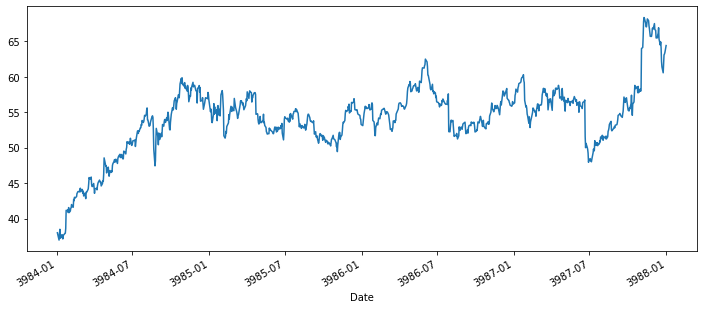

In [4]:
# Plotting closing price

df['Close'].plot(figsize=(12,5)) #by default line price

<h4> Rolling mean </h4>

df.rolling(
    window,
    min_periods=None,
    center=False,
    win_type=None,
    on=None,
    axis=0,
    closed=None,
)

In [5]:
# 7 day window, each section of 7 days and perform some agg function on it and keep rolling along

df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


First six values are NaN and it is beacause we have not reached serven values yet to take the average of it. So everytime (n-1) values will be empty

2020-11-04 14:30:10,719 [4488] WARNING  py.warnings: c:\users\home\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)

2020-11-04 14:30:10,750 [4488] WARNING  py.warnings: c:\users\home\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)



<AxesSubplot:xlabel='Date'>

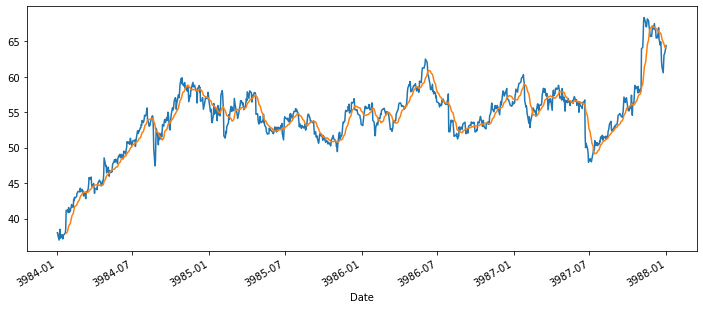

In [6]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=15).mean()['Close'].plot()

In [7]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [8]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


In [9]:
df.tail()

,Close,Volume,Close: 30 Day Mean
Date,,,
2018-12-24,60.56,6323252,65.963703
2018-12-26,63.08,16646238,65.791913
2018-12-27,63.20,11308081,65.647000
2018-12-28,63.39,7712127,65.525000
2018-12-31,64.40,7690183,65.437000


2020-11-04 14:30:17,503 [4488] WARNING  py.warnings: c:\users\home\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)

2020-11-04 14:30:17,508 [4488] WARNING  py.warnings: c:\users\home\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)



<AxesSubplot:xlabel='Date'>

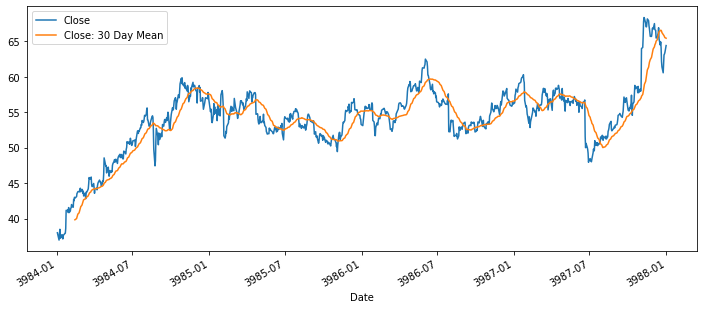

In [10]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5))

<h4> Expanding </h4>

2020-11-04 14:30:20,085 [4488] WARNING  py.warnings: c:\users\home\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)



<AxesSubplot:xlabel='Date'>

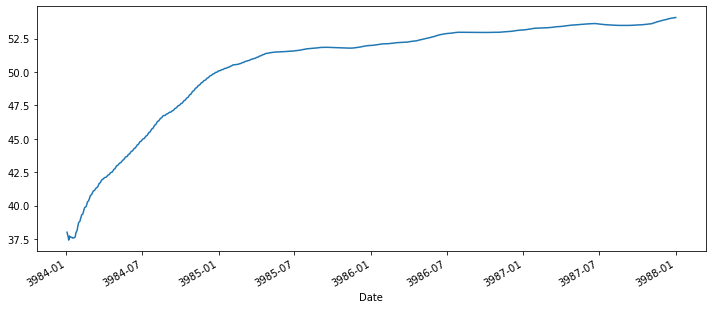

In [11]:
df['Close'].expanding().mean().plot(figsize=(12,5))

As we go ahead into data points, we have more and more data points to accumulate from previous datapoints and the overall average become almost same with less difference as we move ahead in time

Expanding function accumulates all previous data points